# Challenge 1

1. Run the KMeans in your own Twitter data to create segments for users. Try different numbers of clusters, and columns that might be more meaningful. What works best? How do you evaluate?
2. Merge the best user segmentation you found back with the tweets data, and do some visualizations of key metrics from the tweets data with each user segment. What insights do you get?

# Task 1

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweets = pd.read_pickle('JingjingWang_export.pkl')

In [3]:
tweets.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope'],
      dtype='object')

In [4]:
tweets.dtypes

id                                     object
created_at                     datetime64[ns]
from_user_name                         object
from_user_id                            int64
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_listed                        int64
from_user_realname                     object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_description                  object
from_user_url                          object
from_user_verified                      int64
from_user_profile_image_url            object
from_user_created_at           datetime64[ns]
from_user_withheld_scope               object
from_user_favourites_count              int64
source                                 object
location                               object
geo_lat                           

In [5]:
tweets.isna().sum()

id                                  0
created_at                          0
from_user_name                      0
from_user_id                        0
from_user_lang                      0
from_user_tweetcount                0
from_user_followercount             0
from_user_friendcount               0
from_user_listed                    0
from_user_realname                  0
from_user_utcoffset            237747
from_user_timezone             237747
from_user_description           34940
from_user_url                  153085
from_user_verified                  0
from_user_profile_image_url         0
from_user_created_at                0
from_user_withheld_scope       237747
from_user_favourites_count          0
source                              0
location                        67768
geo_lat                        236209
geo_lng                        236209
text                                0
retweet_id                     110849
retweet_count                       0
favorite_cou

In [6]:
users = tweets[['from_user_name', 'from_user_id', 'from_user_realname',
       'from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_created_at']]

In [7]:
users.head()

,from_user_name,from_user_id,from_user_realname,from_user_verified,from_user_description,from_user_url,from_user_profile_image_url,from_user_utcoffset,from_user_timezone,from_user_lang,from_user_tweetcount,from_user_followercount,from_user_friendcount,from_user_favourites_count,from_user_listed,from_user_withheld_scope,from_user_created_at
0,GriffBed,821516432844451840,BedGriff,0,#Veggie #PrisonBreak #Lost #BreakingBad #GOT #...,https://www.peta.org/,http://pbs.twimg.com/profile_images/1093275369...,None,None,en,13130,944,2625,106553,3,None,2017-01-18 00:35:55
1,AppLovin,334906910,AppLovin,0,AppLovin helps indie and established mobile ga...,http://www.applovin.com,http://pbs.twimg.com/profile_images/1013056691...,None,None,en,5058,10995,9912,682,327,None,2011-07-13 21:12:43
2,NewsMobilidade,3027779564,Mobilidade Zero ®,0,Perfil dedicado as notícias do Rio de janeiro.,None,http://pbs.twimg.com/profile_images/6018426086...,None,None,pt,12203,1263,164,1881,16,None,2015-02-18 23:28:03
3,gabriel_irdk,1067244201153388545,Coalinha ❤,0,All we have to decide is what to do with the t...,None,http://pbs.twimg.com/profile_images/1086975835...,None,None,pt,299,64,144,1053,0,None,2018-11-27 02:30:20
4,cmccaerdydd,873516254107140096,Cyfryngau Myfyrwyr Cymraeg Caerdydd,0,Platfform gan fyfyrwyr sy'n hybu a rhannu cynn...,None,http://pbs.twimg.com/profile_images/8749618129...,None,None,en,642,269,165,171,2,None,2017-06-10 12:24:38


In [8]:
users['from_user_name'].value_counts()

fmraizesnoar       647
NOARNOTICIAFM      501
AJ5C               376
spiksius           367
AdoptOrlandoPpl    303
_ANIME_SONG_       188
uamsnurses         163
SSSWeather         149
virginmedia        129
megapix            115
ChuckWicker        105
nwsmidsouth        105
Ant1988             90
Throwaw47913722     90
LeoOliv36317413     90
AtIndia_sServis     88
iembot_lzk          88
aonghusoha          87
ShyKeenan           85
IEvangelion__       82
J26856126           77
Marco_De_Paulo      76
ToghCon             75
Tylerlindell        74
MartasTante         72
grattongirl         68
IT360NewsCom        67
stampycatfan01      67
Patinadores1        65
UldisVarnevichs     64
                  ... 
raiany_fideles       1
CarolBacelar15       1
GNImoveisBH          1
s0berlydrunk         1
maycomjr01           1
vgoghope             1
ammal_yusuf          1
Noroca777            1
Rcardaraujo          1
BadGirlVeneno        1
yogadtr              1
correiacomin         1
Rafssb_    

In [9]:
users = users.drop_duplicates(subset='from_user_name')

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=4)

In [12]:
def check_lang(lang, desired_lang):
    if lang == desired_lang:
        return 1
    return 0

In [13]:
users['from_user_lang'].value_counts()

pt         74381
en         71882
es          8324
ja          4258
tr          4038
th          3292
fr          2141
id          1796
ko          1739
en-gb       1249
it          1154
de          1146
ar           714
lv           593
ru           507
ro           333
nl           290
sv           262
pl           196
vi           172
ga           134
en-GB        125
ca            93
zh-CN         87
zh-TW         85
zh-tw         73
fi            63
da            48
zh-cn         47
el            43
hu            43
sr            33
no            28
bg            26
cs            24
cy            22
he            19
hr            19
uk            16
hi            16
xx-lc         12
pt-PT         12
sk            10
msa           10
fa            10
gl             8
fil            3
ta             2
es-MX          2
eu             2
zh-HK          2
et             1
ur             1
zh-Hant        1
en-IN          1
mr             1
Name: from_user_lang, dtype: int64

In [14]:
users['pt'] = users['from_user_lang'].apply(check_lang, args=('pt',))
users['en'] = users['from_user_lang'].apply(check_lang, args=('en',))
users['es'] = users['from_user_lang'].apply(check_lang, args=('es',))

In [15]:
users.columns

Index(['from_user_name', 'from_user_id', 'from_user_realname',
       'from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_created_at', 'pt', 'en', 'es'],
      dtype='object')

In [16]:
users.dtypes

from_user_name                         object
from_user_id                            int64
from_user_realname                     object
from_user_verified                      int64
from_user_description                  object
from_user_url                          object
from_user_profile_image_url            object
from_user_utcoffset                    object
from_user_timezone                     object
from_user_lang                         object
from_user_tweetcount                    int64
from_user_followercount                 int64
from_user_friendcount                   int64
from_user_favourites_count              int64
from_user_listed                        int64
from_user_withheld_scope               object
from_user_created_at           datetime64[ns]
pt                                      int64
en                                      int64
es                                      int64
dtype: object

In [17]:
users['segment'] = kmeans.fit_predict(users[['pt','en','es', 'from_user_friendcount', 'from_user_tweetcount']])

In [18]:
users[['en', 'es', 'pt', 'from_user_friendcount','from_user_tweetcount', 'segment']].groupby('segment').mean().transpose()

segment,0,1,2,3
en,0.371196,0.402509,0.465529,6.818182e-01
es,0.050845,0.045695,0.066973,4.545455e-02
pt,0.398853,0.417548,0.237689,7.575758e-02
from_user_friendcount,2625.357488,790.788107,8639.751149,2.007586e+04
from_user_tweetcount,120694.375906,12602.996352,436078.300066,1.795151e+06


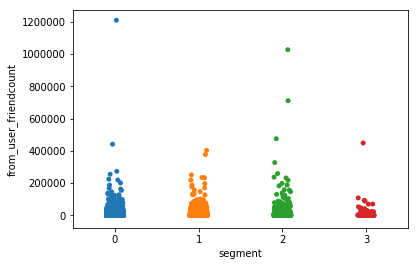

In [19]:
sns.stripplot(x="segment", y="from_user_friendcount", data=users, jitter=True)

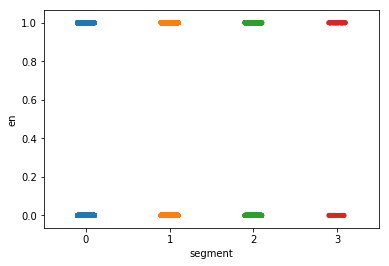

In [20]:
sns.stripplot(x="segment", y="en", data=users, jitter=True)

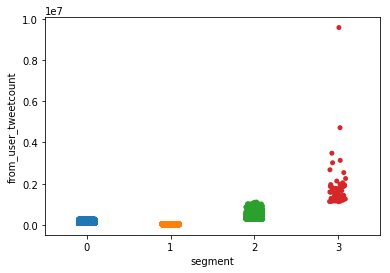

In [21]:
sns.stripplot(x="segment", y="from_user_tweetcount", data=users, jitter=True)

In [22]:
sns.swarmplot(x="from_user_friendcount", y="from_user_tweetcount", data=users, hue="segment", size=10)

KeyboardInterrupt: 

* Then I tried with 5 clusters instead

In [23]:
kmeans = KMeans(n_clusters=5)

In [24]:
users['segment2'] = kmeans.fit_predict(users[['pt','en','es', 'from_user_friendcount', 'from_user_tweetcount']])

In [25]:
users[['en', 'es', 'pt', 'from_user_friendcount','from_user_tweetcount', 'segment2']].groupby('segment2').mean().transpose()

segment2,0,1,2,3,4
en,0.403656,6.013986e-01,0.365267,0.439374,1.0
es,0.045619,6.293706e-02,0.050242,0.063885,0.0
pt,0.416684,1.328671e-01,0.413806,0.262060,0.0
from_user_friendcount,770.989574,1.419310e+04,2387.207728,7236.413733,198.0
from_user_tweetcount,11633.422759,1.265095e+06,105209.024163,350492.047371,9579995.0


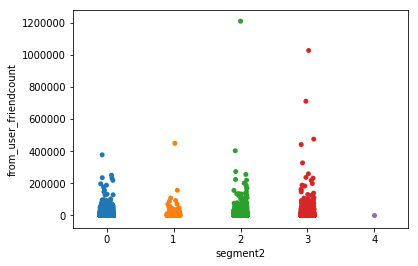

In [26]:
sns.stripplot(x="segment2", y="from_user_friendcount", data=users, jitter=True)

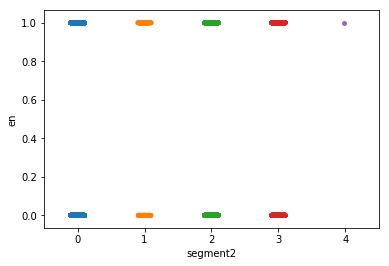

In [27]:
sns.stripplot(x="segment2", y="en", data=users, jitter=True)

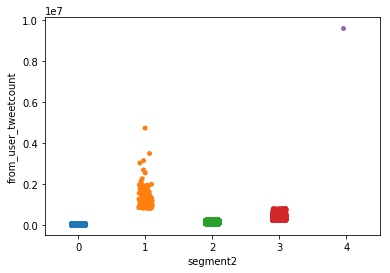

In [28]:
sns.stripplot(x="segment2", y="from_user_tweetcount", data=users, jitter=True)

It seems that 5 clusters have more overlaps than 4 clusters, therefore I would go for segementation of 4 clusters.

# Task 2

In [30]:
tweets.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope'],
      dtype='object')

In [31]:
users.columns

Index(['from_user_name', 'from_user_id', 'from_user_realname',
       'from_user_verified', 'from_user_description', 'from_user_url',
       'from_user_profile_image_url', 'from_user_utcoffset',
       'from_user_timezone', 'from_user_lang', 'from_user_tweetcount',
       'from_user_followercount', 'from_user_friendcount',
       'from_user_favourites_count', 'from_user_listed',
       'from_user_withheld_scope', 'from_user_created_at', 'pt', 'en', 'es',
       'segment', 'segment2'],
      dtype='object')

In [32]:
users_segment = users[['from_user_name', 'segment']]

In [33]:
users_segment.tail()

,from_user_name,segment
237740,leinsecuregirl,0
237741,sandraiansen,1
237742,LikeImHalf,1
237743,nickinglis,1
237744,ahobaray,1


In [34]:
tweets_with_segments = tweets.merge(users_segment, how="left", on="from_user_name")

In [35]:
tweets_with_segments.columns

Index(['id', 'created_at', 'from_user_name', 'from_user_id', 'from_user_lang',
       'from_user_tweetcount', 'from_user_followercount',
       'from_user_friendcount', 'from_user_listed', 'from_user_realname',
       'from_user_utcoffset', 'from_user_timezone', 'from_user_description',
       'from_user_url', 'from_user_verified', 'from_user_profile_image_url',
       'from_user_created_at', 'from_user_withheld_scope',
       'from_user_favourites_count', 'source', 'location', 'geo_lat',
       'geo_lng', 'text', 'retweet_id', 'retweet_count', 'favorite_count',
       'to_user_id', 'to_user_name', 'in_reply_to_status_id', 'filter_level',
       'lang', 'possibly_sensitive', 'quoted_status_id', 'withheld_copyright',
       'withheld_scope', 'segment'],
      dtype='object')

In [36]:
tweets_with_segments[['segment', 'from_user_favourites_count']].groupby('segment').mean()

,from_user_favourites_count
segment,
0,42947.555405
1,10679.677475
2,64590.536976
3,7285.693227


In [ ]:
sns.countplot(x = "segment",hue ="from_user_favourites_count", data=tweets_with_segments, palette="Blues");

KeyboardInterrupt: 

This script runs too long, therefore I interuppt it.

In [37]:
users.to_pickle('JingjingWang_users_segmented.pkl')
tweets_with_segments.to_pickle('JingjingWang_TweetsWithSegments.pkl')

# Challenge 2

1. Change the features of the logistic model created in scikit-learn, and see if you get to a better model to predict clicks. How does this model look like? How do you know it is actually better than the one I created?
2. Create a model for predicting sell. 

# Task 1
**Data preparation**

In [40]:
webdata = pd.read_excel('web_campaign_simulated 2.xlsx')

In [41]:
webdata.columns

Index(['id', 'age', 'female', 'used_search', 'referral', 'time_spent',
       'campaign_1', 'campaign_2', 'click', 'sell_old', 'sell'],
      dtype='object')

In [42]:
webdata.dtypes

id              int64
age             int64
female          int64
used_search     int64
referral       object
time_spent      int64
campaign_1      int64
campaign_2      int64
click           int64
sell_old        int64
sell            int64
dtype: object

In [43]:
webdata.head()

,id,age,female,used_search,referral,time_spent,campaign_1,campaign_2,click,sell_old,sell
0,1,40,1,1,tumblr,204,1,0,0,1,0
1,2,49,0,0,,239,1,0,0,0,1
2,3,20,1,0,google,238,0,0,0,1,1
3,4,19,1,0,google,111,1,1,0,1,0
4,5,46,1,1,twitter,159,0,0,1,1,0


In [44]:
webdata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,9010.0,2141.001887,670.144769,1.0,2253.25,2483.0,2483.0,2483.0
age,9010.0,28.344728,11.573714,18.0,23.00,23.0,23.0,67.0
female,9010.0,0.140622,0.347650,0.0,0.00,0.0,0.0,1.0
used_search,9010.0,0.862486,0.344408,0.0,1.00,1.0,1.0,1.0
time_spent,9010.0,188.782464,108.709242,1.0,96.00,187.0,282.0,380.0
campaign_1,9010.0,0.863929,0.342883,0.0,1.00,1.0,1.0,1.0
campaign_2,9010.0,0.863263,0.343589,0.0,1.00,1.0,1.0,1.0
click,9010.0,0.386903,0.487068,0.0,0.00,0.0,1.0,1.0
sell_old,9010.0,0.700222,0.458186,0.0,0.00,1.0,1.0,1.0
sell,9010.0,0.385572,0.486757,0.0,0.00,0.0,1.0,1.0


In [45]:
webdata['click'].value_counts()

0    5524
1    3486
Name: click, dtype: int64

In [46]:
webdata['sell'].value_counts()

0    5536
1    3474
Name: sell, dtype: int64

In [47]:
webdata['referral'].value_counts()

google          1879
                1830
facebook         923
newsletter B     912
tumblr           879
newsletter A     869
twitter          859
nyt              859
Name: referral, dtype: int64

In [48]:
def check_referral(referral, site):
    if referral == site:
        return 1
    return 0

In [49]:
webdata['google'] = webdata['referral'].apply(check_referral, args=('google',))
webdata['facebook'] = webdata['referral'].apply(check_referral, args=('facebook',))
webdata['news_a'] = webdata['referral'].apply(check_referral, args=('newsletter A',))
webdata['news_b'] = webdata['referral'].apply(check_referral, args=('newsletter B',))
webdata['nyt'] = webdata['referral'].apply(check_referral, args=('nyt',))
webdata['tumblr'] = webdata['referral'].apply(check_referral, args=('tumblr',))
webdata['twitter'] = webdata['referral'].apply(check_referral, args=('twitter',))

In [50]:
webdata.columns

Index(['id', 'age', 'female', 'used_search', 'referral', 'time_spent',
       'campaign_1', 'campaign_2', 'click', 'sell_old', 'sell', 'google',
       'facebook', 'news_a', 'news_b', 'nyt', 'tumblr', 'twitter'],
      dtype='object')

In [51]:
webdata.head()

,id,age,female,used_search,referral,time_spent,campaign_1,campaign_2,click,sell_old,sell,google,facebook,news_a,news_b,nyt,tumblr,twitter
0,1,40,1,1,tumblr,204,1,0,0,1,0,0,0,0,0,0,1,0
1,2,49,0,0,,239,1,0,0,0,1,0,0,0,0,0,0,0
2,3,20,1,0,google,238,0,0,0,1,1,1,0,0,0,0,0,0
3,4,19,1,0,google,111,1,1,0,1,0,1,0,0,0,0,0,0
4,5,46,1,1,twitter,159,0,0,1,1,0,0,0,0,0,0,0,1


**Data Exploration**

In [52]:
webdata.groupby('click').mean()

,id,age,female,used_search,time_spent,campaign_1,campaign_2,sell_old,sell,google,facebook,news_a,news_b,nyt,tumblr,twitter
click,,,,,,,,,,,,,,,,
0,2140.753440,28.204381,0.137762,0.860970,182.844678,0.859522,0.862056,0.612419,0.358617,0.208726,0.116039,0.080739,0.078566,0.088885,0.087618,0.096850
1,2141.395582,28.567126,0.145152,0.864888,198.191624,0.870912,0.865175,0.839357,0.428285,0.208262,0.080895,0.121343,0.137120,0.105565,0.113310,0.092943


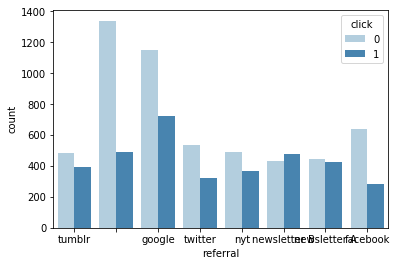

In [53]:
sns.countplot(x="referral", hue ="click", data=webdata, palette="Blues");

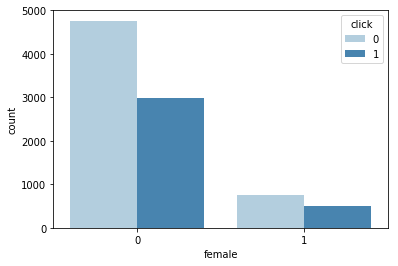

In [54]:
sns.countplot(x="female", hue ="click", data=webdata, palette="Blues");

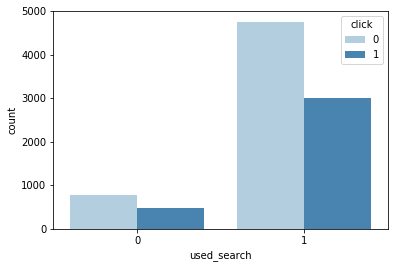

In [55]:
sns.countplot(x="used_search", hue ="click", data=webdata, palette="Blues");

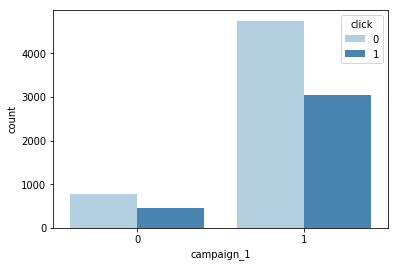

In [56]:
sns.countplot(x="campaign_1", hue ="click", data=webdata, palette="Blues");

The above distributions show that "referral", "female","used_search", and "campagin" are all good predictors for clicks.

**Modelling**

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logit_clf = LogisticRegression(max_iter=1000, fit_intercept = True)

In [59]:
features = ['age','female','google','time_spent', 'used_search', 'campaign_1']

In [60]:
logit_clf.fit(webdata[features], webdata['click'])

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [61]:
pd.DataFrame(np.transpose(logit_clf.coef_), features)

,0
age,0.004736
female,0.079912
google,-0.001201
time_spent,0.001293
used_search,0.064918
campaign_1,0.171095


In [62]:
import statsmodels.api as sm

In [63]:
logit = sm.Logit(webdata['click'], sm.add_constant(webdata[features]))

In [64]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.664418
         Iterations 4


In [65]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  click   No. Observations:                 9010
Model:                          Logit   Df Residuals:                     9003
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                0.004383
Time:                        14:34:53   Log-Likelihood:                -5986.4
converged:                       True   LL-Null:                       -6012.8
                                        LLR p-value:                 1.346e-09
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.0782      0.136     -7.926      0.000      -1.345      -0.812
age             0.0050      0.002      2.097      0.036       0.000       0.010
female          0.0846      0.075      1.129    

**Results**
* The results showed that "age","time_spent", and "campaign_1" are significant predictors for clicks.
* This model (Pseudo R-squ.= 0.004383) is slightly better than the example model (Pseudo R-squ.= 0.004307)

**Predicting**
* The first person is 30, male,does not use Google,spent 140 seconds on the site, has not searched for the product, and is not exposed to campagin 1.
* The first person is 45, female,uses Google,spent 450 seconds on the site, has searched for the product, and is exposed to campagin 1.

In [66]:
people = [[30,0,0,140,0,0], [45,1,1,450,1,1]]

In [67]:
logit_clf.predict(people)

array([0, 1], dtype=int64)

In [68]:
logit_clf.predict_proba(people)

array([[0.67538077, 0.32461923],
       [0.48650192, 0.51349808]])

The possibility for the first person to click is 32.5% while that for the second person is 51.3%.

# Task 2

In [69]:
webdata.groupby('sell').mean()

,id,age,female,used_search,time_spent,campaign_1,campaign_2,click,sell_old,google,facebook,news_a,news_b,nyt,tumblr,twitter
sell,,,,,,,,,,,,,,,,
0,2131.114162,28.348085,0.143244,0.860910,116.192919,0.861272,0.859827,0.360007,0.688042,0.211344,0.097905,0.095737,0.100614,0.097182,0.098808,0.094473
1,2156.758492,28.339378,0.136442,0.864997,304.457686,0.868164,0.868739,0.429764,0.719632,0.204088,0.109672,0.097582,0.102188,0.092401,0.095567,0.096718


It seemed that "time_spent" is a very important predictor for sale.

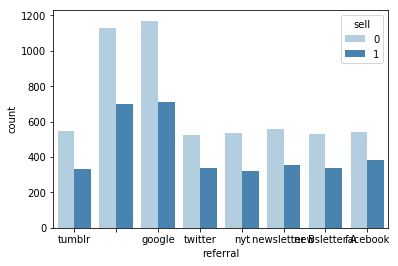

In [70]:
sns.countplot(x="referral", hue ="sell", data=webdata, palette="Blues");

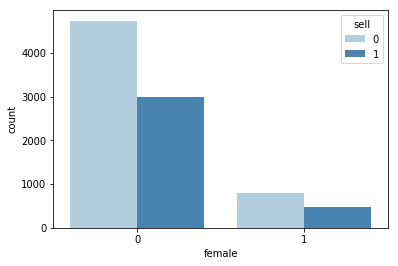

In [71]:
sns.countplot(x="female", hue ="sell", data=webdata, palette="Blues");

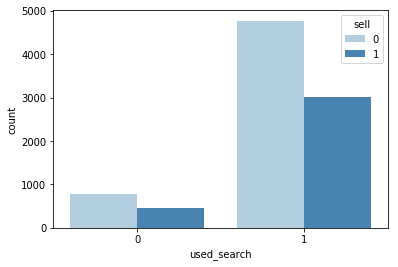

In [72]:
sns.countplot(x="used_search", hue ="sell", data=webdata, palette="Blues");

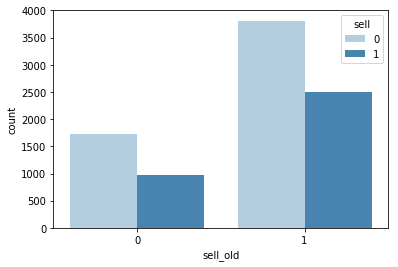

In [73]:
sns.countplot(x="sell_old", hue ="sell", data=webdata, palette="Blues");

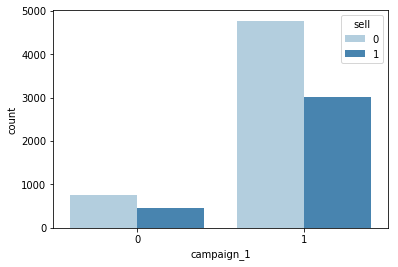

In [74]:
sns.countplot(x="campaign_1", hue ="sell", data=webdata, palette="Blues");

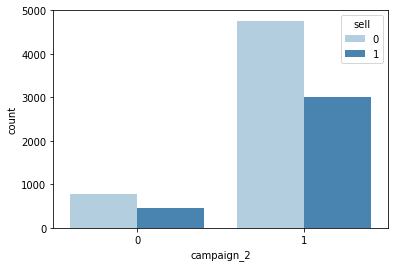

In [75]:
sns.countplot(x="campaign_2", hue ="sell", data=webdata, palette="Blues");

In [82]:
features2 = ['time_spent','used_search','click','sell_old', 'campaign_1','campaign_2']

In [83]:
logit_clf.fit(webdata[features2], webdata['sell'])

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [84]:
pd.DataFrame(np.transpose(logit_clf.coef_), features2)

,0
time_spent,0.087477
used_search,-0.356872
click,0.444507
sell_old,-0.426359
campaign_1,-0.087941
campaign_2,-0.520427


In [85]:
logit = sm.Logit(webdata['sell'], sm.add_constant(webdata[features2]))

In [86]:
result2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.025091
         Iterations 14


In [87]:
print(result2.summary())

                           Logit Regression Results                           
Dep. Variable:                   sell   No. Observations:                 9010
Model:                          Logit   Df Residuals:                     9003
Method:                           MLE   Df Model:                            6
Date:                Sun, 03 Mar 2019   Pseudo R-squ.:                  0.9624
Time:                        14:35:51   Log-Likelihood:                -226.07
converged:                       True   LL-Null:                       -6007.2
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -81.1906      5.534    -14.670      0.000     -92.038     -70.343
time_spent      0.3521      0.024     14.766      0.000       0.305       0.399
used_search    -0.0879      0.413     -0.213    

The results indicated that "time_spent" and "click" are significant predictors for sale.